In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import time
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\Users\RANJIT
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\RANJIT
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\RANJIT
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
url = r'https://www.flipkart.com/vivo-t2x-5g-marine-blue-128-gb/p/itmcb8f0f6a85d5d?pid=MOBGZBFU4HBKKFSN&fm=organic&ppt=dynamic&ppn=dynamic&ssid=8s0u8f1q340000001694066529729'

In [3]:
# service = Service(ChromeDriverManager().install())
service = Service(executable_path=r'chromedriver-win64/chromedriver.exe')
options = Options()
options.add_argument("start-maximized")
options.add_argument("incognito")
options.add_argument("disable-extensions")
# options.add_argument("headless")
driver = webdriver.Chrome(service=service, options=options)
actions = ActionChains(driver)

In [4]:
driver.get(url)
time.sleep(5)
all_comments = driver.find_element(By.CSS_SELECTOR, "._3UAT2v")
all_comments.click()
time.sleep(5)
next_comments = driver.find_element(By.LINK_TEXT, "NEXT")
next_comments.click()
next_url = next_comments.get_attribute('href')
print(next_url)
driver.close()

https://www.flipkart.com/vivo-t2x-5g-marine-blue-128-gb/product-reviews/itmcb8f0f6a85d5d?pid=MOBGZBFU4HBKKFSN&lid=LSTMOBGZBFU4HBKKFSNRCJ28C&marketplace=FLIPKART&page=2


In [30]:
test = r'https://www.flipkart.com/infinix-inbook-y1-plus-intel-core-i3-10th-gen-1005g1-8-gb-256-gb-ssd-windows-11-home-xl28-thin-light-laptop/p/itm64fd5584698f7?pid=COMGMM3HY5EMNFZA&lid=LSTCOMGMM3HY5EMNFZAYFBZG8&marketplace=FLIPKART&q=laptop&store=6bo%2Fb5g&srno=s_1_1&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&fm=search-autosuggest&iid=en_1nTT3caENQXJtRfbz2HuwRBYGYzl-5ecC8X4tlIXJhK0YciwA-9NC37cmqaVOou5je33Zl4s2Lz2iTwqKCeVFg%3D%3D&ppt=sp&ppn=sp&ssid=zdkojlsz4w0000001694116197551&qH=312f91285e048e09'
raw_html = requests.get(next_url)
parsed_html = BeautifulSoup(raw_html.content, features='html5lib')

In [6]:
comments = [comment.text.replace('READ MORE', '') for comment in parsed_html.find_all('div', attrs={'class': 't-ZTKy'})]
ratings = [star.text for star in parsed_html.find_all('div', attrs={'class': '_3LWZlK _1BLPMq'})]
heads = [head.text for head in parsed_html.find_all('p', attrs={'class': '_2-N8zT'})]
for data in zip(ratings, heads, comments):
    print(data)

('5', 'Super!', 'Nice')
('5', 'Mind-blowing purchase', 'Best  mobile phone')
('5', 'Worth every penny', 'Nice Phone, Best Camera Performance, And Gaming Performance 80%,')
('5', 'Great product', 'Thank You Flipkart Vivo T2x 5g')
('5', 'Just wow!', 'I wrote this review after 15 days using..Battery backup is good...Camera is good...Finger print sensor very good...Speaker very good....No heating issue..Touch screen very good..Multi tasking performance very good....Build quality superb...Network connectivity awesome...18W charger is not good...100% charge it takes 1.5 hr....Overall vivo t2x is a great phone in this price range ...go for it....😍😍')
('5', 'Perfect product!', 'Looks nice 👍')
('5', 'Fabulous!', 'Performance battery camera everything is good 👍')
('5', 'Perfect product!', 'Super 👍😊😊😊😊😊')
('5', 'Mind-blowing purchase', 'Superb quality I love vivo 👌👌')
('5', 'Perfect product!', 'Looks are amazing.Camera is also good.Night mode works well.Overall a decent 5g phone.90hz refresh rate

In [7]:
raw_html = requests.get(url)
parsed_html = BeautifulSoup(raw_html.content, features='html5lib')
rating = parsed_html.find_all('div', attrs={'class': '_2d4LTz'})[0].text
rating

'4.4'

In [9]:
stars = parsed_html.find_all('div', attrs={'class': '_1uJVNT'})
rating_division = {}
count = 5
for i in stars:
    rating_division[str(count)+'★'] = i.text
    count -= 1
pd.DataFrame([rating_division]).T

,0
5★,"85,111"
4★,"23,908"
3★,"7,587"
2★,"3,176"
1★,"6,725"


In [10]:
five_star = parsed_html.find_all('div', attrs={'class': '_1uJVNT'})[0].text
five_star

'85,111'

In [11]:
comments

['Nice',
 'Best  mobile phone',
 'Nice Phone, Best Camera Performance, And Gaming Performance 80%,',
 'Thank You Flipkart Vivo T2x 5g',
 'I wrote this review after 15 days using..Battery backup is good...Camera is good...Finger print sensor very good...Speaker very good....No heating issue..Touch screen very good..Multi tasking performance very good....Build quality superb...Network connectivity awesome...18W charger is not good...100% charge it takes 1.5 hr....Overall vivo t2x is a great phone in this price range ...go for it....😍😍',
 'Looks nice 👍',
 'Performance battery camera everything is good 👍',
 'Super 👍😊😊😊😊😊',
 'Superb quality I love vivo 👌👌',
 'Looks are amazing.Camera is also good.Night mode works well.Overall a decent 5g phone.90hz refresh rate must be there.']

In [15]:
def possitive_words():
    out = []
    with open('positive.txt', 'r') as file:
        for line in file.readlines():
            word = stemmer.stem(line.replace('\n', '').casefold())
            out.append(word)
    return out
def negative_words():
    out = []
    with open('negative.txt', 'r') as file:
        for line in file.readlines():
            word = stemmer.stem(line.replace('\n', '').casefold())
            out.append(word)
    return out

In [16]:
def clean_words(sentence):
    result = []
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    for word in word_tokenize(sentence):
        word = stemmer.stem(word.casefold())
        if word not in stopwords.words('english'):
            result.append(word)
    return result

In [17]:
for sentence in comments:
    print(clean_words(sentence))

['nice']
['best', 'mobil', 'phone']
['nice', 'phone', 'best', 'camera', 'perform', 'game', 'perform']
['thank', 'flipkart', 'vivo', 'x', 'g']
['wrote', 'thi', 'review', 'day', 'use', 'batteri', 'backup', 'good', 'camera', 'good', 'finger', 'print', 'sensor', 'veri', 'good', 'speaker', 'veri', 'good', 'heat', 'issu', 'touch', 'screen', 'veri', 'good', 'multi', 'task', 'perform', 'veri', 'good', 'build', 'qualiti', 'superb', 'network', 'connect', 'awesom', 'w', 'charger', 'good', 'charg', 'take', 'hr', 'overal', 'vivo', 'x', 'great', 'phone', 'thi', 'price', 'rang', 'go']
['look', 'nice']
['perform', 'batteri', 'camera', 'everyth', 'good']
['super']
['superb', 'qualiti', 'love', 'vivo']
['look', 'amaz', 'camera', 'also', 'good', 'night', 'mode', 'work', 'well', 'overal', 'decent', 'g', 'phone', 'hz', 'refresh', 'rate', 'must']


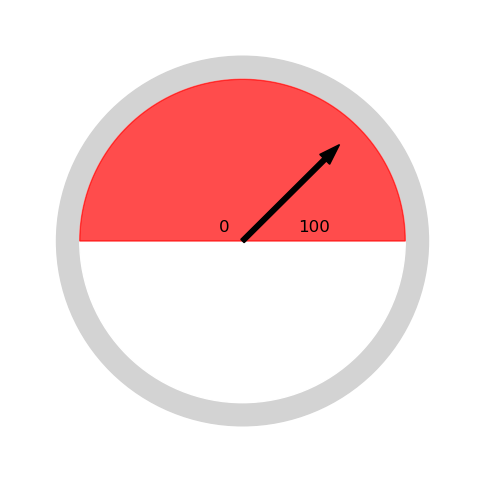

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def create_speedometer(speed):
    # Ensure the speed is within the range [0, 100]
    speed = max(0, min(speed, 100))
    
    fig, ax = plt.subplots(figsize=(6, 6))

    # Create the speedometer background
    ax.add_patch(plt.Circle((0.5, 0.5), 0.4, color='lightgray'))
    ax.add_patch(plt.Circle((0.5, 0.5), 0.35, color='white'))

    # Create the speedometer arc
    theta = np.linspace(0, np.pi, 100)
    x = 0.5 + 0.35 * np.cos(theta)
    y = 0.5 + 0.35 * np.sin(theta)
    ax.fill(x, y, color='red', alpha=0.7)

    # Create the needle indicating the speed
    needle_length = 0.25
    needle_angle = (speed / 100) * np.pi
    needle_x = 0.5 + needle_length * np.cos(needle_angle - np.pi / 2)
    needle_y = 0.5 + needle_length * np.sin(needle_angle - np.pi / 2)
    ax.add_patch(patches.FancyArrow(0.5, 0.5, needle_x - 0.5, needle_y - 0.5, width=0.01, color='black'))

    # Add labels for 0 and 100
    ax.text(0.45, 0.52, '0', fontsize=12, color='black')
    ax.text(0.62, 0.52, '100', fontsize=12, color='black')

    # Set axis limits and remove ticks
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    plt.show()

# Test the function with a speed value between 0 and 100
speed_value = 75
create_speedometer(speed_value)


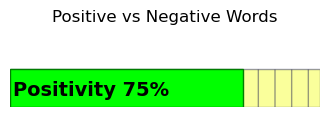

In [159]:
import matplotlib.pyplot as plt

def create_speedometer(positivity):
    percent = max(0, min(positivity, 100))

    fig, ax = plt.subplots(figsize=(4, 1))
    ax.add_patch(plt.Rectangle((0, 0), 1, 0.5, alpha=0.4, hatch='|', edgecolor='#010045', facecolor='#f3ff05'))
    ax.add_patch(plt.Rectangle((0, 0), percent / 100, 0.5, edgecolor='#007d00', facecolor='#00ff00'))

    ax.text(0.01, 0.15, f'Positivity {percent}%', fontsize=14, color='black', fontweight='bold')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.title(f'Positive vs Negative Words')

    plt.show()
speed_value = 75
create_speedometer(speed_value)


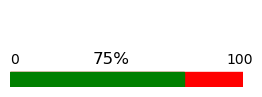

In [66]:
import matplotlib.pyplot as plt

def create_speedometer(speed):
    speed = max(0, min(speed, 100))
    
    fig, ax = plt.subplots(figsize=(3, 1))
    ax.add_patch(plt.Rectangle((0, 0), 1, 0.2, color='red'))
    ax.add_patch(plt.Rectangle((0, 0), speed / 100, 0.2, color='green'))

    ax.text(0, 0.3, '0', fontsize=10, color='black')
    ax.text(0.93, 0.3, '100', fontsize=10, color='black')

    # Add the speed value text
    ax.text(speed / 200 - 0.02, 0.3, f'{speed}%', fontsize=12, color='black')

    # Set axis limits and remove ticks
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    plt.show()

# Test the function with a speed value between 0 and 100
speed_value = 75
create_speedometer(speed_value)
